# 4.2 Exercise: Probability Mass Functions and Cumulative Distribution Functions 
# Rahul Rajeev


**3.1 Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [ ]:
import numpy as np
import thinkstats2
import thinkplot
import first

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [5]:
resp = nsfg.ReadFemResp()

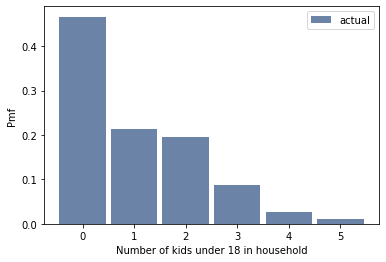

In [50]:
# creating probability mass function from the numkdhh respondent variable and testing the plot
numkdhh_pmf = thinkstats2.Pmf(resp.numkdhh, label="actual")
thinkplot.Hist(numkdhh_pmf)
thinkplot.Config(xlabel="Number of kids under 18 in household", ylabel="Pmf")

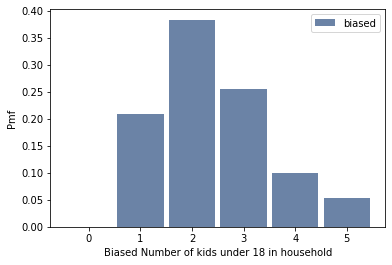

In [13]:
# compute the biased distribution
biased_numkdhh = BiasPmf(numkdhh_pmf, label="biased")
thinkplot.Hist(biased_numkdhh)
thinkplot.Config(xlabel="Biased Number of kids under 18 in household", ylabel="Pmf")

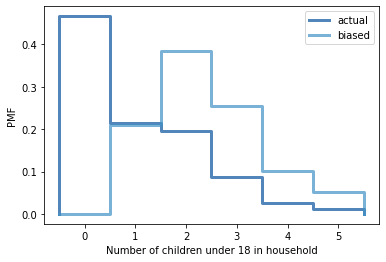

In [51]:
# plotting the actual and biased distributions over each other, used step functions for clarity
thinkplot.PrePlot(2)
thinkplot.Pmfs([numkdhh_pmf, biased_numkdhh])
thinkplot.Config(xlabel="Number of children under 18 in household", ylabel="PMF")

In [52]:
# normal pmf mean
numkdhh_pmf.Mean()

1.024205155043831

In [53]:
# biased pmf mean
biased_numkdhh.Mean()

2.403679100664282

**3.2 Exercise:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \xbar = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \xbar)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [1]:
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.Items())

In [2]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [56]:
# comparing pmf mean and pmf var to mean and var provided by pmf
print(numkdhh_pmf.Mean(), PmfMean(numkdhh_pmf))
print(numkdhh_pmf.Var(), PmfVar(numkdhh_pmf))

1.024205155043831 1.024205155043831
1.4128643263531195 1.4128643263531195


**4.1 Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [41]:
# first getting the distribution
import first
live, firsts, others = first.MakeFrames()

# getting the first_weights data, and dropping the NA values
first_wgts = firsts.totalwgt_lb
first_wgts_actual = first_wgt.dropna()

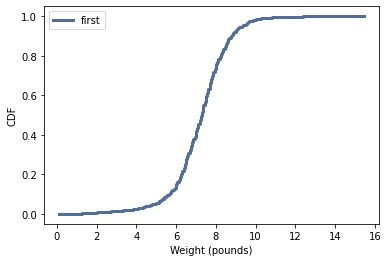

In [68]:
#plotting the cdf
first_wgts_cdf = thinkstats2.Cdf(first_wgts_actual, label='first')
thinkplot.Cdf(first_wgts_cdf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [69]:
# finding my percentile
first_wgts_cdf.PercentileRank(8.6)

# I still called my mom to apologize because being in the 87th percentile is still not a joke

87.18771487508596

**4.2 Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [70]:
# generating the numbers

sample = np.random.random(1000)

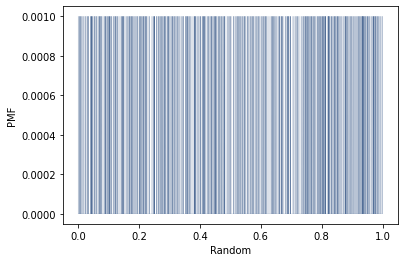

In [74]:
# pmf

random_pmf = thinkstats2.Pmf(sample)
thinkplot.Pmf(random_pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random', ylabel='PMF')

# Thoughts:
# The pmf graph appears to be too condensed, and there isn't a way to see whether the probabilities add up to 1.
# It just looks like a barcode. 

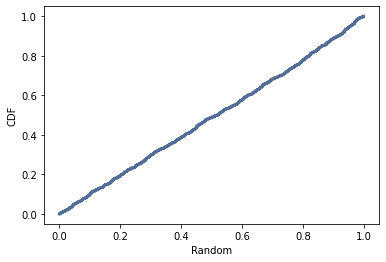

In [76]:
# cdf
random_cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Random', ylabel='CDF')

# Thoughts:
# The CDF graph is approximately a straight line, which means that the distribution is uniform.
# 10% of the data is below the 10th percentile, 20% of the data is below the 20th percentile, as the book says.
